### Installation notwendiger Module

In [ ]:
%%capture
!"C:\Program Files\Python310\python.exe" -m pip install matplotlib numpy scikit-learn

In [2]:
pip install matplotlib numpy scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


### K-Nearest Neighbor Algorithmus:
Kurzerklärung: Bestimmung der Abstände zu den k-nächsten Nachbarn. K ist eine Anzahl, also wie viele Nachbarn sollen betrachtet werden. Man sucht nun aus den k-nächsten Nachbarn heraus, zu welcher Klasse diese gehören. Zur Klasse, die am häufigsten vertreten ist, gehört dann vermutlich auch der neue Datenpunkt. 

#### Parameter: 
Für die Anwendung des Algorithmus benötigen wir ein Dataset, bestehend aus Featuren(x) und den enstprechenden Klassen(y). Features sind hierbei als Mehrdimensional anzusehen.

dataset = (x, y)  
mit x := Features  
und y := Classes  

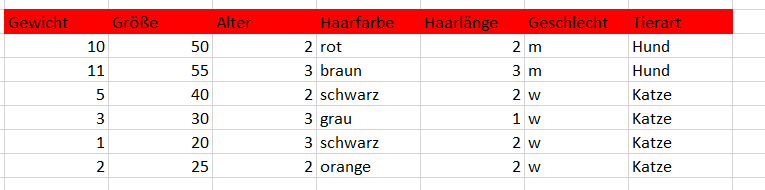


Weiter benötigt man einen Hyperparamter K. Man könnte dies auch als Parameter des Algorithmus sehen.

K := Hyperparameter für die nächsten k Nachbarn (Wie viele Nachbarn sollen betrachtet werden?)

sample := Neuer Datenpunkt zum Klassifizieren 



In [1]:
import numpy as np
np.random.seed(42)          
#initialize the random number generator. The random number generator needs a number to start with.

## Erstellen eines Übungsdataset
Wir laden im nächsten Schritt einige Zufallszahlen um den Algorithmus auszuprobieren. In der Praxis ist dies keine sinnvolle Variante. Da die selbst generierten Zufallszahlen nie eine Wirklichkeit abbilden können. Deswegen ist das Datensammeln gerade für die Großkonzerne so wichtig. (Stichwort: BigData)

Laden des Datensatzes (x enthält die Features und y die zugehörigen Klassen.)

In [2]:
x=np.loadtxt('x_Dataset.csv',dtype=float,delimiter=',')
y=np.loadtxt('y_Dataset.csv').astype(np.int64)

In [12]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"x:\n{x[:3]}")
print(f"y:\n{y[:3]}")

x shape: (59, 2)
y shape: (59,)
x:
[[ 1.04518895 -1.09637441]
 [ 1.27861585  0.14005792]
 [ 0.44226476  0.29700947]]
y:
[0 0 0]


In [4]:
import matplotlib.pyplot as plt
def plot_dataset(x, y):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):                               #enumerate liefert die Anzahl der aktuellen Iterationen(index)
        plt.scatter(point[0], point[1], color=colors[y[index]])     #sowie den Wert des Elements bei der aktuellen Iteration(point)
    plt.show()

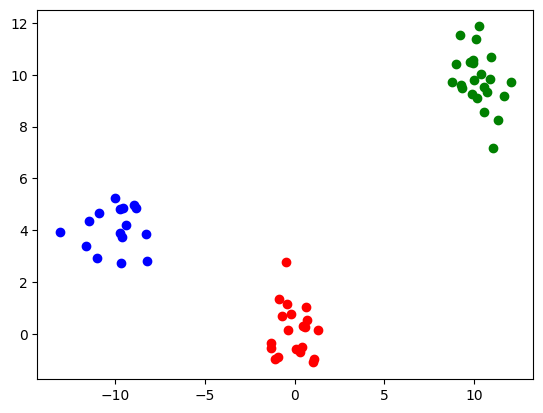

In [5]:
plot_dataset(x, y)

## KNN Implementierung
Für **fit()** und **predict()** werden ein Trainingsdatenset und ein Testdataset benötigt. Das bedeutet man teilt z.B. seinen Datensatz in zwei getrennte Datensätze um damit seinen Algorithmus zu trainieren und anschließend zu testen. In dieser Einführung erstellen wir einfach zwei neue Testdaten, mit der wir unser Ergebnis überprüfen.

Mit der Methode **score** können wir bewerten, wie oft unser Algorithmus bei diesem Datensatz richtig lag.

Die Methode **predict** dient zur Vorhersage eines unbekannten Punktes.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
accuracy=clf.score(x_test, y_test)

print(f"x_test:\n {x_test}")
print(f"y_test:\n {y_test}")
print(f"score: {accuracy}")

x_test:
 [[  1.04518895  -1.09637441]
 [ -0.45362407   1.14187173]
 [ -9.76275777   3.89509289]
 [ -0.91014679  -0.89136955]
 [ 10.87767708   9.83337286]
 [ 10.29099697  11.85963355]
 [  9.34539071   9.47067885]
 [-11.61849214   3.3862383 ]
 [  9.96461243  10.46195216]
 [  0.67043004   0.55308042]
 [ 10.56491524   9.53240717]
 [ -0.22107376   0.76063677]
 [ 11.67941788   9.17935754]
 [-10.00988548   5.26193266]
 [  0.28796105  -0.70862647]
 [ -1.30504976  -0.52392768]
 [ -1.10179635  -0.95588276]
 [ -1.3070375   -0.35121289]]
y_test:
 [0 0 1 0 2 2 2 1 2 0 2 0 2 1 0 0 0 0]
score: 1.0


## Einen neuen unbekannten Datenpunkt klassifizieren

In [16]:

x_test_neuer_Punkt = np.array([[0.0, 4.0], [-5.0, 4.0]])
y_test_neuer_Punkt = np.array([0, 1])
print(f"x_test:\n {x_test_neuer_Punkt}")
print(f"y_test:\n {y_test_neuer_Punkt}")
y_pred=clf.predict(x_test_neuer_Punkt)
print(f"y_pred:\n {y_pred}")

x_test:
 [[ 0.  4.]
 [-5.  4.]]
y_test:
 [0 1]
y_pred:
 [0 1]


In [17]:

def plot_dataset(x, y,x_test,y_test):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):                               #enumerate liefert die Anzahl der aktuellen Iterationen(index)
        plt.scatter(point[0], point[1], color=colors[y[index]]) 
    for index, point in enumerate(x_test_neuer_Punkt):
        plt.scatter(point[0], point[1], color='black')    #sowie den Wert des Elements bei der aktuellen Iteration(point)
    plt.show()

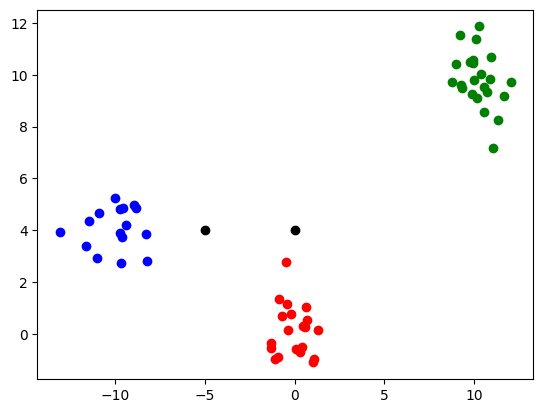

In [18]:
plot_dataset(x,y,x_test,y_test)